# Molecular and spatial features from CSLs
The clustered and projected data can be used to extract different features:

- Intensity: per-cluster mean and size features. Needs to be calculated first to set up the adata.
- Co-occurrence: spatial co-occurrence between pairs of clusters at different distances.
- Object stats: number and area of connected components per cluster

The features are saved as an `anndata` object and can be used to compare molecular abundance within CSLs and spatial co-occurrence of CSLs in different conditions (e.g. perturbations).

In [50]:
import os

from IPython.display import display
import anndata as ad

from campa.pl import (
    plot_mean_size,
    plot_object_stats,
    plot_co_occurrence,
    plot_mean_intensity,
    get_intensity_change,
    plot_intensity_change,
    plot_co_occurrence_grid,
)
from campa.tl import Experiment, extract_features, FeatureExtractor
from campa.utils import load_config, init_logging, merged_config

init_logging()

## Extract features
Here, we will use the high-level api function `extract_features` to compute the features. Alternatively, the cli can be used:
```
campa extract_features $CAMPA_DIR/notebooks/params/example_features_params.py
```

In [22]:
# load parameter dictionary
params = load_config("params/example_feature_params.py")
# just use the first variable_params configuration here
for variable_params in params.variable_feature_params[:1]:
    cur_params = merged_config(params.feature_params, variable_params)
    print(cur_params)

# extract features
extract_features(cur_params)

INFO:Experiment:Setting up experiment test/CondVAE_pert-CC
INFO:Experiment:Initialised from existing experiment in test/CondVAE_pert-CC
INFO:extract_features:extracting features ['intensity', 'co-occurrence', 'object-stats'] from 184A1_unperturbed/I09
INFO:extract_features:initialising from existing adata /home/icb/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/aggregated/full_data/184A1_unperturbed/I09/features_annotation.h5ad


{'experiment_dir': 'test/CondVAE_pert-CC', 'cluster_name': 'clustering_res0.2', 'cluster_dir': None, 'cluster_col': 'annotation', 'data_dirs': ['184A1_unperturbed/I09', '184A1_unperturbed/I11', '184A1_meayamycin/I12', '184A1_meayamycin/I20'], 'save_name': 'features_annotation.h5ad', 'force': False, 'features': ['intensity', 'co-occurrence', 'object-stats'], 'co_occurrence_params': {'min': 2.0, 'max': 80.0, 'nsteps': 20, 'logspace': True, 'num_processes': 8}, 'object_stats_params': {'features': ['area', 'circularity', 'elongation', 'extent'], 'channels': []}}


INFO:Experiment:Setting up experiment test/CondVAE_pert-CC
INFO:Experiment:Initialised from existing experiment in test/CondVAE_pert-CC
INFO:Experiment:Cluster annotation: using cluster data in aggregated/sub-0.1
INFO:FeatureExtractor:extract_intensity_size: adata is not None. Specify force=True to overwrite. Exiting.
INFO:FeatureExtractor:calculating co-occurrence for intervals [ 2.         2.4285605  2.9489532  3.5808558  4.3481627  5.279888
  6.4112644  7.785072   9.453259  11.478907  13.93861   16.925379
 20.552155  24.956076  30.30367   36.79715   44.682056  54.25654
 65.882645  80.       ] and clustering clustering_res0.2 (col: annotation)
INFO:FeatureExtractor:calculating co-occurrence for 0 objects
INFO:FeatureExtractor:calculating object stats ['area', 'circularity', 'elongation', 'extent'] and channels [] for clustering clustering_res0.2 (col: annotation)
INFO:MPPData:Created new: MPPData for TestData (247872 mpps with shape (1, 1, 35) from 20 objects). Data keys: ['x', 'y', 

Cannot read with memmap:  /home/icb/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/aggregated/full_data/184A1_unperturbed/I09/clustering_res0.2.npy


INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_res0.2', 'latent']
INFO:MPPData:Loaded data from 184A1_unperturbed/I09, with base data from 184A1_unperturbed/I09
INFO:MPPData:Subsetting from 35 channels
INFO:MPPData:Restricted channels to 34 channels
INFO:MPPData:The following channels were excluded ['00_EU']
INFO:MPPData:Subtracting channel-specific background value defined in column mean_background
INFO:MPPData:Rescaling MPP intensities per channels with predefined values
INFO:MPPData:Adding conditions: ['perturbation_duration_one_hot', 'cell_cycle_one_hot']
INFO:MPPData:Looking up condition perturbation_duration, with postprocess one_hot
INFO:convert_condition:Converting condition perturbation_duration to numbers
INFO:MPPData:Looking up condition cell_cycle, with postprocess one_hot
INFO:convert_condition:Converting condition cell_cycle to numbers
INFO:MPPData:Before subsetting: 12 objects
INFO:MPPData:Subsetting to NO_NAN cell_cycle: 12 objects


Cannot read with memmap:  /home/icb/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/aggregated/full_data/184A1_unperturbed/I11/clustering_res0.2.npy


INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_res0.2', 'latent']
INFO:MPPData:Loaded data from 184A1_unperturbed/I11, with base data from 184A1_unperturbed/I11
INFO:MPPData:Subsetting from 35 channels
INFO:MPPData:Restricted channels to 34 channels
INFO:MPPData:The following channels were excluded ['00_EU']
INFO:MPPData:Subtracting channel-specific background value defined in column mean_background
INFO:MPPData:Rescaling MPP intensities per channels with predefined values
INFO:MPPData:Adding conditions: ['perturbation_duration_one_hot', 'cell_cycle_one_hot']
INFO:MPPData:Looking up condition perturbation_duration, with postprocess one_hot
INFO:convert_condition:Converting condition perturbation_duration to numbers
INFO:MPPData:Looking up condition cell_cycle, with postprocess one_hot
INFO:convert_condition:Converting condition cell_cycle to numbers
INFO:MPPData:Before subsetting: 14 objects
INFO:MPPData:Subsetting to NO_NAN cell_cycle: 14 objects


Cannot read with memmap:  /home/icb/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/aggregated/full_data/184A1_meayamycin/I12/clustering_res0.2.npy


INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_res0.2', 'latent']
INFO:MPPData:Loaded data from 184A1_meayamycin/I12, with base data from 184A1_meayamycin/I12
INFO:MPPData:Subsetting from 35 channels
INFO:MPPData:Restricted channels to 34 channels
INFO:MPPData:The following channels were excluded ['00_EU']
INFO:MPPData:Subtracting channel-specific background value defined in column mean_background
INFO:MPPData:Rescaling MPP intensities per channels with predefined values
INFO:MPPData:Adding conditions: ['perturbation_duration_one_hot', 'cell_cycle_one_hot']
INFO:MPPData:Looking up condition perturbation_duration, with postprocess one_hot
INFO:convert_condition:Converting condition perturbation_duration to numbers
INFO:MPPData:Looking up condition cell_cycle, with postprocess one_hot
INFO:convert_condition:Converting condition cell_cycle to numbers
INFO:MPPData:Before subsetting: 11 objects
INFO:MPPData:Subsetting to NO_NAN cell_cycle: 11 objects
IN

Cannot read with memmap:  /home/icb/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/aggregated/full_data/184A1_meayamycin/I20/clustering_res0.2.npy


INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_res0.2', 'latent']
INFO:MPPData:Loaded data from 184A1_meayamycin/I20, with base data from 184A1_meayamycin/I20
INFO:MPPData:Subsetting from 35 channels
INFO:MPPData:Restricted channels to 34 channels
INFO:MPPData:The following channels were excluded ['00_EU']
INFO:MPPData:Subtracting channel-specific background value defined in column mean_background
INFO:MPPData:Rescaling MPP intensities per channels with predefined values
INFO:MPPData:Adding conditions: ['perturbation_duration_one_hot', 'cell_cycle_one_hot']
INFO:MPPData:Looking up condition perturbation_duration, with postprocess one_hot
INFO:convert_condition:Converting condition perturbation_duration to numbers
INFO:MPPData:Looking up condition cell_cycle, with postprocess one_hot
INFO:convert_condition:Converting condition cell_cycle to numbers
INFO:MPPData:Before subsetting: 9 objects
INFO:MPPData:Subsetting to NO_NAN cell_cycle: 9 objects
INFO

## Explore and plot extracted features

Features are stored in `anndata` objects with `obs=cells` and `vars=channels`.
Intensity information is stored as layers, co-occurrence scores as `obsm` matrices (`obs x distances` for each cluster-cluster pair),
and object features as matrices in `uns`.

The `FeatureExtractor` class loads this `anndata` object and provides convenience functions to access feature information.

In [23]:
# load data
exp = Experiment.from_dir("test/CondVAE_pert-CC")
extrs = [
    FeatureExtractor.from_adata(
        os.path.join(exp.full_path, "aggregated/full_data", data_dir, "features_annotation.h5ad")
    )
    for data_dir in exp.data_params["data_dirs"]
]

extrs[0].adata

INFO:Experiment:Setting up experiment test/CondVAE_pert-CC
INFO:Experiment:Initialised from existing experiment in test/CondVAE_pert-CC
INFO:Experiment:Setting up experiment test/CondVAE_pert-CC
INFO:Experiment:Initialised from existing experiment in test/CondVAE_pert-CC
INFO:Experiment:Cluster annotation: using cluster data in aggregated/sub-0.1
INFO:Experiment:Setting up experiment test/CondVAE_pert-CC
INFO:Experiment:Initialised from existing experiment in test/CondVAE_pert-CC
INFO:Experiment:Cluster annotation: using cluster data in aggregated/sub-0.1
INFO:Experiment:Setting up experiment test/CondVAE_pert-CC
INFO:Experiment:Initialised from existing experiment in test/CondVAE_pert-CC
INFO:Experiment:Cluster annotation: using cluster data in aggregated/sub-0.1
INFO:Experiment:Setting up experiment test/CondVAE_pert-CC
INFO:Experiment:Initialised from existing experiment in test/CondVAE_pert-CC
INFO:Experiment:Cluster annotation: using cluster data in aggregated/sub-0.1


AnnData object with n_obs × n_vars = 12 × 34
    obs: 'mapobject_id', 'plate_name', 'well_name', 'well_pos_y', 'well_pos_x', 'tpoint', 'zplane', 'label', 'is_border', 'mapobject_id_cell', 'plate_name_cell', 'well_name_cell', 'well_pos_y_cell', 'well_pos_x_cell', 'tpoint_cell', 'zplane_cell', 'label_cell', 'is_border_cell', 'is_mitotic', 'is_mitotic_labels', 'is_polynuclei_HeLa', 'is_polynuclei_HeLa_labels', 'is_polynuclei_184A1', 'is_polynuclei_184A1_labels', 'is_SBF2_Sphase_labels', 'is_SBF2_Sphase', 'Heatmap-48', 'cell_cycle', 'description', 'dimensions', 'id', 'cell_type', 'EU', 'duration', 'perturbation', 'secondary_only', 'siRNA', 'perturbation_duration', 'LocalDensity_Nuclei_800', 'TR_factor', 'TR_norm', 'TR', 'TR_factor_DMSO-unperturbed', 'TR_norm_DMSO-unperturbed', 'obj_id_int'
    uns: 'clusters', 'co_occurrence_params', 'object_stats', 'object_stats_params', 'params'
    obsm: 'co_occurrence_Nuclear periphery_Nuclear periphery', 'co_occurrence_Nuclear periphery_Nuclear speckl

### Intensity features
Intensity features are the mean intensity of channels in each cluster (CSL).

Intensity information for each CSL is contained in a separate layer in `ext.adata.layers`. Overall (per cell) intensity information is stored in `extr.adata.X`.
In addition to the mean intensity per CSL, the adata also contains the size of each CSL per cell in `extr.adata.obs['size']`

In [26]:
# intensity per CSL
print(extrs[0].adata.layers)

# whole cell intensity
print(extrs[0].adata.X)

Layers with keys: intensity_Nuclear periphery, intensity_Nuclear speckles, intensity_Nucleolus, intensity_Nucleoplasm, intensity_PML bodies
[[0.42011893 0.22026281 0.16869229 0.29234102 0.22704637 0.34440973
  0.40021175 0.3518756  0.6928793  0.26836216 0.19774248 0.3095939
  0.256906   0.12243613 0.25150827 0.54718775 0.2776602  0.11295075
  0.01183144 0.32250935 0.30344233 0.634772   0.34309894 0.13315006
  0.40021938 0.62415075 0.5539878  0.1691194  0.53069955 0.4712597
  0.5052133  0.06703009 0.34704855 0.20557712]
 [0.37932354 0.33314565 0.38273746 0.40350354 0.36779916 0.526189
  0.5560788  0.40224683 0.58305204 0.30267096 0.2851223  0.31046897
  0.45587367 0.15438136 0.26978034 0.6150659  0.33405337 0.136777
  0.21450156 0.5145445  0.41075444 0.6235291  0.35639843 0.16537356
  0.4478381  0.50754213 0.6859457  0.22853835 0.55295926 0.55314386
  0.49291092 0.12689012 0.35069072 0.2787473 ]
 [0.4194902  0.36039403 0.48073393 0.52549136 0.35514912 0.55169404
  0.36125478 0.4030966  

It is possible to export the intensity information in one csv file using `extr.extract_intensity_csv`. 
The resulting csv file contains the intensity for each CSL for each channel as columns, 
as well as additionally defined columns.

In [27]:
for extr in extrs:
    extr.extract_intensity_csv(obs=["well_name", "perturbation_duration", "TR"])

We can compare CSL intensities across discrete conditions using a dot plot.

For this, we first combine all intensity information in one adata, adding one observation per CSL.

In [29]:
# get combined adata for dotplots
adatas = [extr.get_intensity_adata() for extr in extrs]
adata_intensity = ad.concat(adatas, index_unique="-")

adata_intensity

AnnData object with n_obs × n_vars = 276 × 34
    obs: 'mapobject_id', 'plate_name', 'well_name', 'well_pos_y', 'well_pos_x', 'tpoint', 'zplane', 'label', 'is_border', 'mapobject_id_cell', 'plate_name_cell', 'well_name_cell', 'well_pos_y_cell', 'well_pos_x_cell', 'tpoint_cell', 'zplane_cell', 'label_cell', 'is_border_cell', 'is_mitotic', 'is_mitotic_labels', 'is_polynuclei_HeLa', 'is_polynuclei_HeLa_labels', 'is_polynuclei_184A1', 'is_polynuclei_184A1_labels', 'is_SBF2_Sphase_labels', 'is_SBF2_Sphase', 'Heatmap-48', 'cell_cycle', 'description', 'dimensions', 'id', 'cell_type', 'EU', 'duration', 'perturbation', 'secondary_only', 'siRNA', 'perturbation_duration', 'LocalDensity_Nuclei_800', 'TR', 'obj_id_int', 'size', 'cluster'

Using this combined adata, we can plot the mean intensity of each channel in each CSL 
and the size of each CSL in the unperturbed cells. 

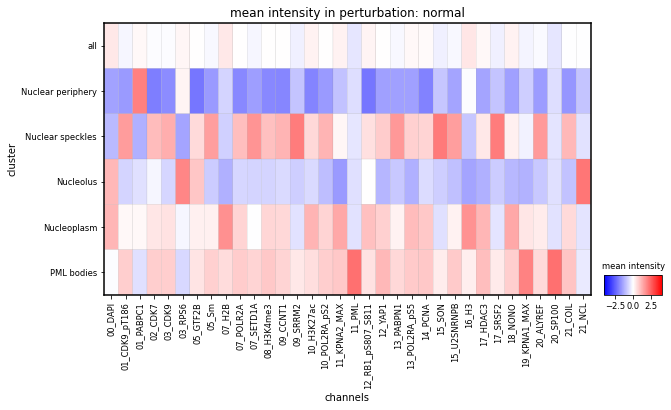

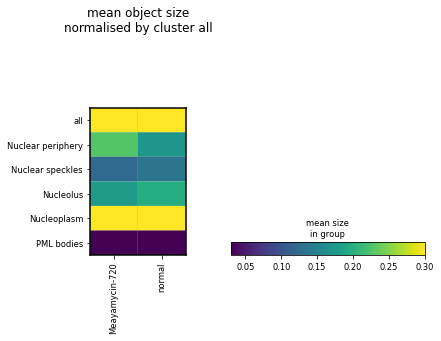

In [30]:
plot_mean_intensity(
    adata_intensity,
    groupby="cluster",
    limit_to_groups={"perturbation": "normal"},
    dendrogram=False,
    layer=None,
    standard_scale="var",
    cmap="bwr",
    vmin=-4,
    vmax=4,
)
plot_mean_size(
    adata_intensity,
    groupby_row="cluster",
    groupby_col="perturbation_duration",
    normby_row="all",
    vmax=0.3,
)

Now, let us visualise the log2fold change in intensity in the Meayamycon perturbation compared to unperturbed cells

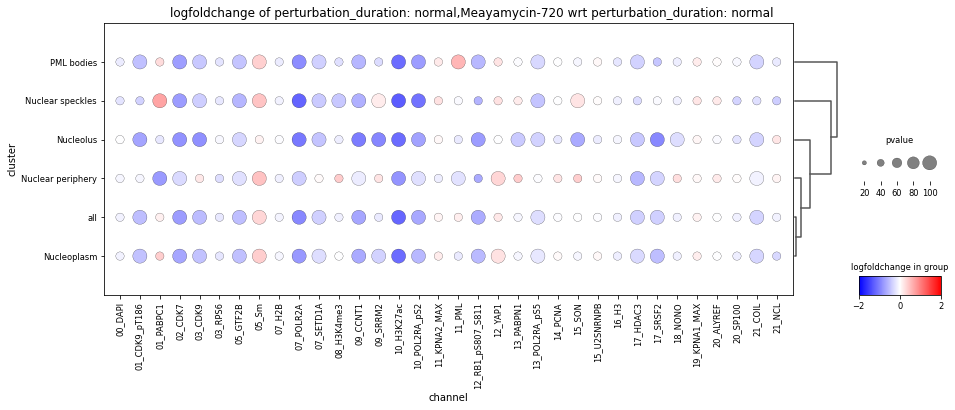

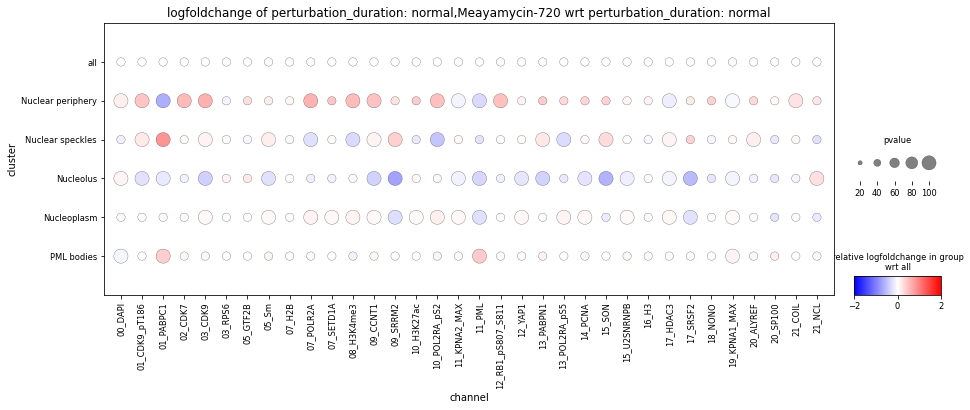

In [32]:
res = get_intensity_change(
    adata_intensity,
    groupby="cluster",
    reference_group="perturbation_duration",
    reference=["normal"],
    limit_to_groups={"perturbation_duration": ["normal", "Meayamycin-720"]},
    color="logfoldchange",
    size="pval",
)
plot_intensity_change(**res, adjust_height=True, figsize=(15, 5), vmin=-2, vmax=2, dendrogram=True)

res = get_intensity_change(
    adata_intensity,
    groupby="cluster",
    reference_group="perturbation_duration",
    reference=["normal"],
    limit_to_groups={"perturbation_duration": ["normal", "Meayamycin-720"]},
    color="logfoldchange",
    size="pval",
    norm_by_group="all",
)
plot_intensity_change(**res, adjust_height=True, figsize=(15, 5), vmin=-2, vmax=2)

### Co-occurrence scores
Co-occurrence scores are calculated for each cluster-cluster pair.
They are stored in `adata.obsm['co_occurrence_{cluster1}_{cluster2}']` as a `n cells x distances` matrix.
The distances used can be found in `adata.uns['co_occurrence_params']`.

In [38]:
display(extrs[0].adata.obsm["co_occurrence_Nuclear periphery_Nuclear speckles"])

print(extrs[0].adata.uns["co_occurrence_params"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.050612,0.062456,0.068676,0.092025,0.118362,0.163567,0.222913,0.312422,0.448773,0.631873,0.822567,0.983232,1.130722,1.276160,1.255666,1.053373,0.891649,0.831072,1.008906
1,0.062659,0.085900,0.089303,0.126872,0.172470,0.248596,0.341348,0.465492,0.638220,0.820941,0.998317,1.060340,1.038289,1.080405,1.124642,1.137186,1.115744,1.008283,0.996524
2,0.000705,0.001455,0.001469,0.008018,0.019143,0.045527,0.083737,0.141385,0.233189,0.377292,0.607747,0.878262,1.077129,1.157793,1.100828,1.019269,0.981647,1.047833,1.046683
3,0.000624,0.003856,0.008277,0.024274,0.058224,0.118894,0.204850,0.328876,0.491139,0.630614,0.744733,0.882375,0.987477,1.054824,1.126753,1.187056,1.164352,1.186786,0.934909
4,0.052707,0.062431,0.069931,0.086721,0.110272,0.145915,0.193819,0.272171,0.398251,0.555957,0.745072,0.944833,1.094900,1.137992,1.089979,1.027295,1.022154,1.086132,1.076287
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.383172,0.660114,0.298750,1.307611,2.840221,0.906138,0.435669,1.164145
6,0.083615,0.117948,0.130433,0.189021,0.267775,0.380903,0.525431,0.727844,0.979614,1.176232,1.236443,1.159702,1.040973,1.096278,1.117542,0.988095,0.985127,0.967673,0.951517
7,0.020229,0.033348,0.047549,0.071561,0.106628,0.160889,0.231221,0.358750,0.542707,0.693535,0.830768,1.004195,1.181318,1.110217,0.991286,1.022190,0.967732,0.936091,1.234968
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.171229,0.212326,0.235551,0.299408,0.367045,0.446664,0.533507,0.645567,0.794971,0.938034,1.028507,1.051516,1.023748,0.989009,0.958407,0.967982,1.075604,1.079193,0.975076


{'interval': array([ 2.       ,  2.4285605,  2.9489532,  3.5808558,  4.3481627,
        5.279888 ,  6.4112644,  7.785072 ,  9.453259 , 11.478907 ,
       13.93861  , 16.925379 , 20.552155 , 24.956076 , 30.30367  ,
       36.79715  , 44.682056 , 54.25654  , 65.882645 , 80.       ],
      dtype=float32)}


We can plot co-occurrence scores by using `campa.pl.co_occurrence` or `campa.pl.co_occurrence_grid`.
First, we need to combine all adata objects into one. For this, we can use `ad.concat`.

In [39]:
# get combined adata
adata_co_occ = ad.concat([extr.adata for extr in extrs], index_unique="-", uns_merge="same")

In [42]:
adata_co_occ.obsm

AxisArrays with keys: co_occurrence_Nuclear periphery_Nuclear periphery, co_occurrence_Nuclear periphery_Nuclear speckles, co_occurrence_Nuclear periphery_Nucleolus, co_occurrence_Nuclear periphery_Nucleoplasm, co_occurrence_Nuclear periphery_PML bodies, co_occurrence_Nuclear speckles_Nuclear periphery, co_occurrence_Nuclear speckles_Nuclear speckles, co_occurrence_Nuclear speckles_Nucleolus, co_occurrence_Nuclear speckles_Nucleoplasm, co_occurrence_Nuclear speckles_PML bodies, co_occurrence_Nucleolus_Nuclear periphery, co_occurrence_Nucleolus_Nuclear speckles, co_occurrence_Nucleolus_Nucleolus, co_occurrence_Nucleolus_Nucleoplasm, co_occurrence_Nucleolus_PML bodies, co_occurrence_Nucleoplasm_Nuclear periphery, co_occurrence_Nucleoplasm_Nuclear speckles, co_occurrence_Nucleoplasm_Nucleolus, co_occurrence_Nucleoplasm_Nucleoplasm, co_occurrence_Nucleoplasm_PML bodies, co_occurrence_PML bodies_Nuclear periphery, co_occurrence_PML bodies_Nuclear speckles, co_occurrence_PML bodies_Nucleolus

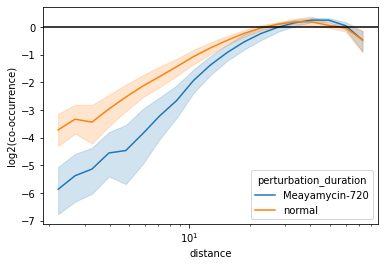

In [43]:
# plot meam co-occ scores
condition = "perturbation_duration"
condition_values = None

# for one cluster-cluster pairing
plot_co_occurrence(adata_co_occ, "Nucleolus", "Nuclear speckles", condition, condition_values)

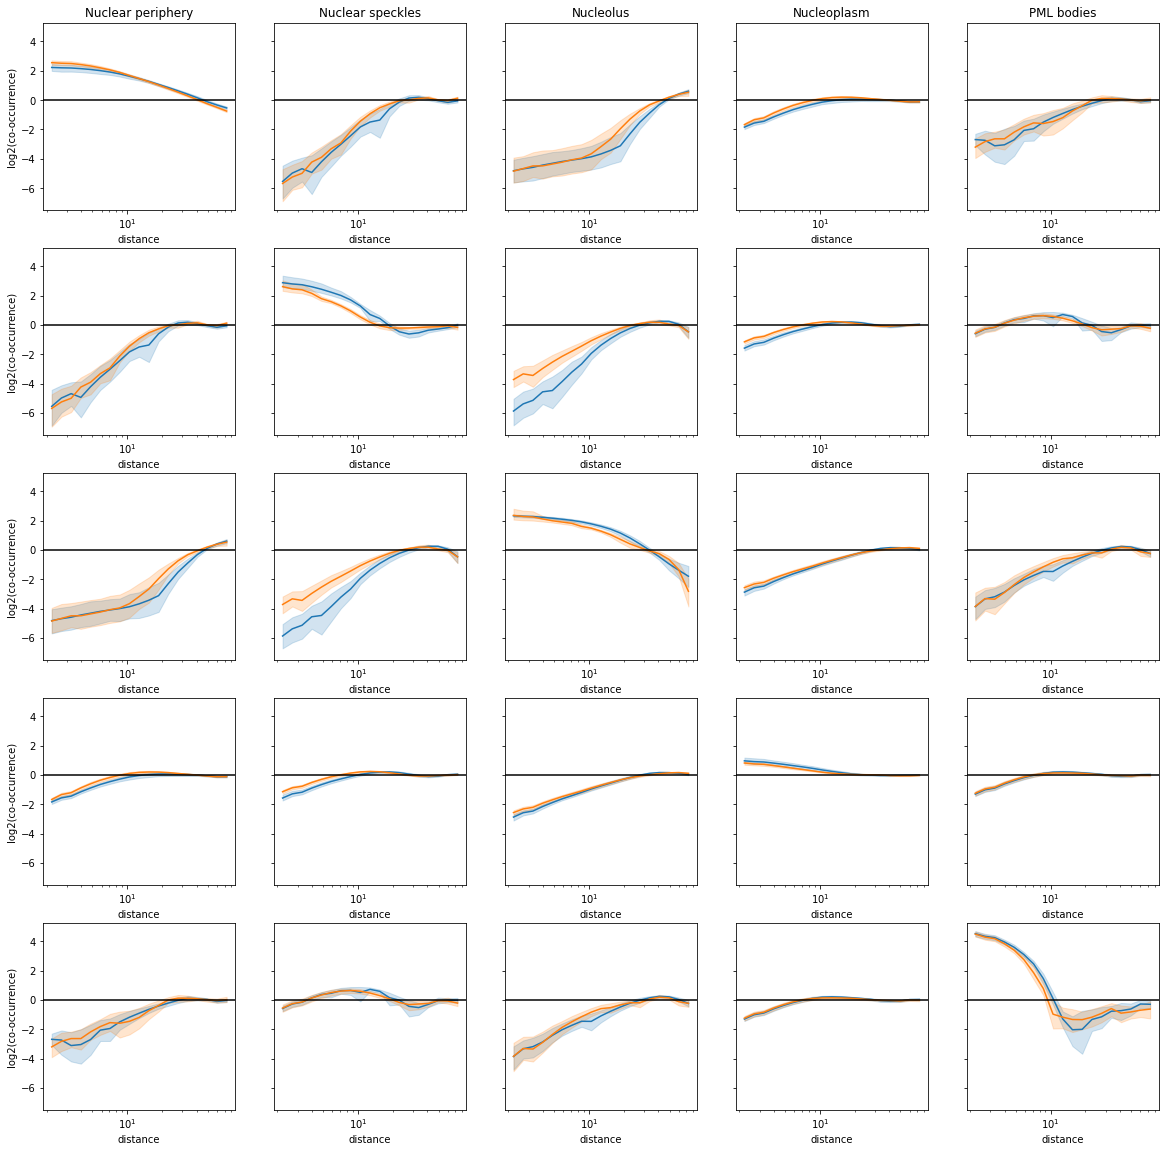

In [44]:
# for all cluster pairings
fig, axes = plot_co_occurrence_grid(adata_co_occ, condition, condition_values, legend=False, ci=95, figsize=(20, 20))

### Object statistics
Object statistics are features extracted from connected components per cluster for each cell.
Possible features are `area`, `circlularity`, `elongation`, and `extent` of connected components.
Per component/region features are calculated and stored in `adata.uns['object_stats']`.

In [46]:
display(extrs[0].adata.uns["object_stats"])

,area,circularity,elongation,extent,mapobject_id,clustering
0,2547,0.030616,0.221770,0.132795,205776,Nuclear periphery
1,5905,0.030418,0.239915,0.366133,205776,Nucleoplasm
2,892,0.590461,0.155758,0.728758,205776,Nucleolus
3,4,1.000000,0.722271,0.444444,205776,Nuclear periphery
4,13,1.000000,0.645211,0.619048,205776,Nuclear periphery
...,...,...,...,...,...,...
524,156,0.870473,0.273297,0.655462,383793,Nuclear speckles
525,6,1.000000,0.507634,0.750000,383793,Nuclear periphery
526,19,1.000000,0.288498,0.760000,383793,Nuclear speckles
527,22,0.862881,0.557794,0.523810,383793,PML bodies


To aggregate this information to per-cell level, `extr.get_object_stats` is used. 
This aggregated the data with the provided aggregation function and stores the result in `.adata.obsm['object_stats_agg']`.
In addition, we can filter small areas below `area_threshold` prior to aggregation.

In [47]:
# aggregate object statistics using median
for extr in extrs:
    _ = extr.get_object_stats(area_threshold=10, agg=["median"])

# combined adatas for plotting
adata_object_stats = ad.concat([extr.adata for extr in extrs], index_unique="-", uns_merge="same")

`campa.pl.plot_object_stats` can be used to plot a boxplot overview of the object stats.

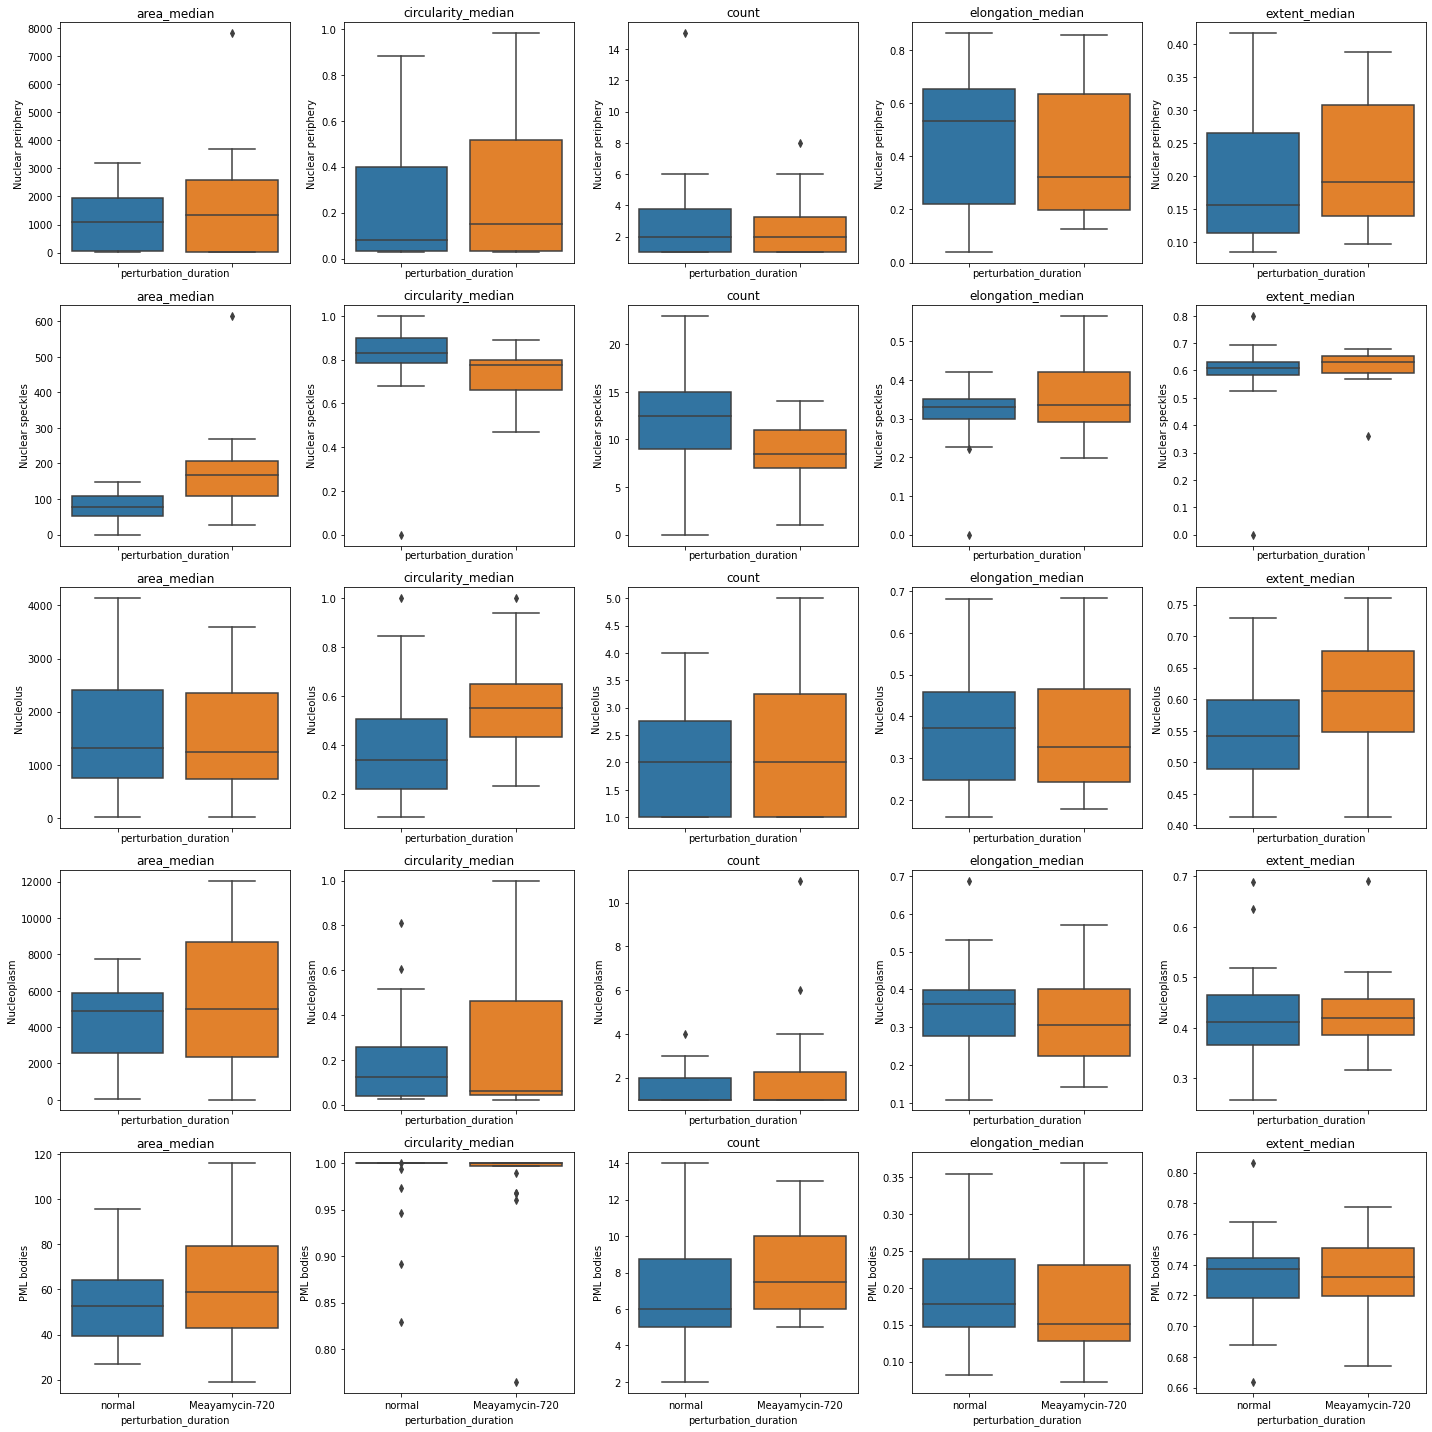

In [52]:
plot_object_stats(adata_object_stats, group_key="perturbation_duration", figsize_mult=(4, 4))